# <span style="color:red"> Traffic </span> <span style="color:orange"> Light </span> <span style="color:green"> Classifier </span>
### A computer vision project 'Traffic Light Classifier' to classify traffic light signals as either red, yellow or green.

<p align="center"><img src=images/all_lights.png  width="500"></p>

## <span style="color:SteelBlue"> Project Overview </span>

- Traffic light classification plays an important role in Advanced Driver Assist as well as self-driving vehicle systems which ensures timely and appropriate reaction to traffic lights in cross sections.  
- In this project, a robust probabilistic approach based classifier has been implemented from scratch to classify traffic light signal's status using computer vision and machine learning techniques.
- Several data cleaning steps, features extraction and a probabilistic metric has been utilized.
- The classifier has been validated on a testing dataset with a **accuracy of 99.66 %**.
- All training stages and prediction stages has been throughly visualized & analyzed and thus improvised.
- The methodology utilized in this project can be generalized and applied to many other computer vision applications.

#### Shashank Kumbhare
email: shashankkumbhare8@gmail.com  
phone: (682) 812-9211  
[LinkedIn](https://www.linkedin.com/in/shashank-kumbhare/)  

[View this project on GitHub](https://github.com/ShashankKumbhare/traffic-light-classifier)  
[Link to the implemented package code](https://github.com/ShashankKumbhare/traffic-light-classifier/tree/main/traffic_light_classifier)

# <span style="color:crimson"> 1. Loading and Visualizing the Traffic Light Dataset </span>

This traffic light dataset consists of 1484 number of color images in 3 categories - red, yellow, and green. As with most human-sourced data, the data is not evenly distributed among the types. There are:
* 904 red traffic light images
* 536 green traffic light images
* 44 yellow traffic light images

*Note: All images come from this [MIT self-driving car course](https://selfdrivingcars.mit.edu/) and are licensed under a [Creative Commons Attribution-ShareAlike 4.0 International License](https://creativecommons.org/licenses/by-sa/4.0/).*


### <span style="color:darkorange"> Import resources </span>

- This project utilizes a custom made Python package `traffic_light_classifier` created especially for this project.
- `traffic_light_classifier` contains a classifier, plotting tools, feature extraction functionalities, and datasets for this project.
- Libraries used: `OpenCV-Python`, `scipy`, `matplotlib`, `numpy`.
- This library offers tools which enables to analyze and visualize the entire training and prediction process stages.

In [1]:
# Installing package from GitHub >>
# !pip install git+https://github.com/ShashankKumbhare/traffic-light-classifier.git#egg=traffic-light-classifier

In [2]:
import traffic_light_classifier as tlc


Importing package 'traffic_light_classifier'...
  + Adding module 'helpers'...
  - Done!
  + Adding module 'tests'...
  - Done!
  + Adding module 'plots'...
  - Done!
  + Adding module 'modify_images'...
  - Done!
  + Adding module 'extract_feature'...
  - Done!
  + Adding module 'statistics'...
  - Done!
  + Adding module 'datasets'...
  - Done!
  + Adding module 'Model'...
  - Done!
Package 'traffic_light_classifier' imported sucessfully !!
version 1.0.0



### <span style="color:darkorange"> Training and Testing Data </span>

All 1484 of the traffic light images are separated into training and testing datasets. 

* 80% of these images are training images for training classifier model.
* 20% are test images, which will be used to test the accuracy of the classifier.
* All images are pictures of 3-light traffic lights with one light illuminated.

The training and testing datasets are included in the `traffic_light_classifier` package.

In [3]:
# Loading dataset from package >>
IMAGES_AND_LABELS_TRAIN = tlc.datasets.train.images_and_labels
IMAGES_AND_LABELS_TEST  = tlc.datasets.test.images_and_labels

### <span style="color:darkorange"> Visualize the Data </span>

The first steps in analyzing any dataset are to:

1. Load the data.
2. Look at the data.

Seeing what it looks like will give us an idea of:

- What to look for in the images.
- What kind of noise or inconsistencies we have to deal with, and so on.

This will help us understand the image dataset, and **understanding a dataset is part of making predictions about the data**.

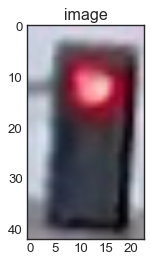

'red'

In [4]:
# Plaotting image >>
image_selected = IMAGES_AND_LABELS_TRAIN[0][0]
label_selected = IMAGES_AND_LABELS_TRAIN[0][1]
tlc.plots.plot_images(image_selected)
label_selected

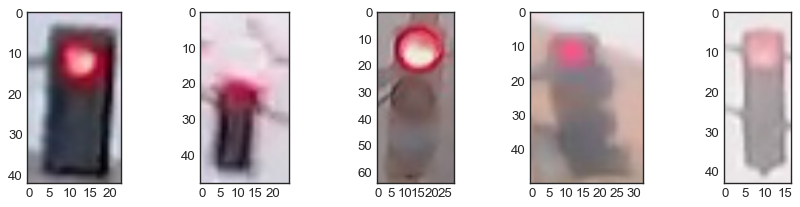

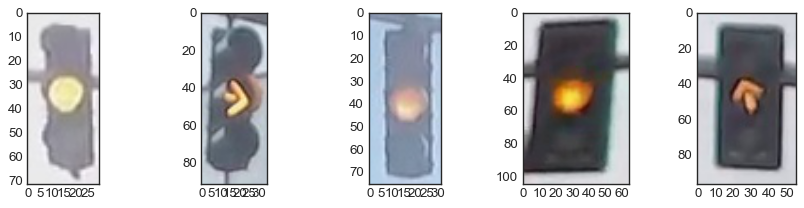

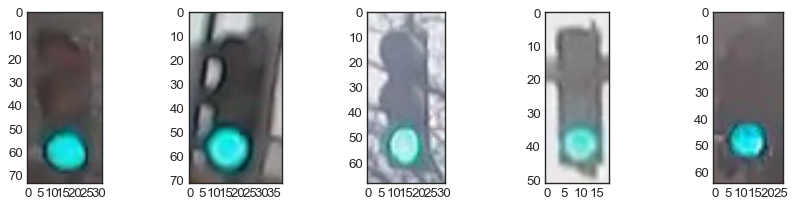

In [5]:
tlc.plots.plot_images( tlc.datasets.train.images.red[0:5],    figsizeScale = 0.8 )
tlc.plots.plot_images( tlc.datasets.train.images.yellow[0:5], figsizeScale = 0.8 )
tlc.plots.plot_images( tlc.datasets.train.images.green[0:5],  figsizeScale = 0.8 )

# <span style="color:crimson"> 2. Pre-process the Data </span>

Standardizing the input and output helps in processing and modifying data.

### Input

This means that every input image should have:

1. The same format,
2. The same size, and so on.

We'll be creating features by performing the same analysis on every picture, and for a classification task like this, it's important that **similar images create similar features**! 

### Output

We also need the output to be a label that is easy to read and easy to compare with other labels. It is good practice to convert categorical data like "red" and "green" to numerical data.

A very common classification output is a 1D list that is the length of the number of classes - three in the case of red, yellow, and green lights - with the values 0 or 1 indicating which class a certain image is.  

For example, since we have three classes (red, yellow, and green), we can make a list with the order: [red value, yellow value, green value]. In general, order does not matter, we choose the order [red value, yellow value, green value] in this case to reflect the position of each light in descending vertical order.

Lights should have labels:  
A red light: [1, 0, 0].  
A yellow light: [0, 1, 0].  
A green light: [0, 0, 1].  

These labels are called **one-hot encoded labels**.

*(Note: one-hot encoding will be especially important when you work with [machine learning algorithms](https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/)).*

<p align="center"><img src=images/processing_steps.png  width="800"></p>


### <span style="color:darkorange"> Standardize the input images </span>

- Resize each image to the desired input size: 32x32px.
- It's very common to have square input sizes that can be rotated (and remain the same size), and analyzed in smaller, square patches.
- It's also important to make all images the same size so that they can be sent through the same pipeline of classification steps!


### <span style="color:darkorange"> Standardize the output </span>

With each loaded image, we also specify the expected output. For this, we use **one-hot encoding**.

* One-hot encode the labels. To do this, create an array of zeros representing each class of traffic light (red, yellow, green), and set the index of the expected class number to 1. 

Since we have three classes (red, yellow, and green), we have imposed an order of: [red value, yellow value, green value]. To one-hot encode, say, a yellow light, we would first initialize an array to [0, 0, 0] and change the middle value (the yellow value) to 1: [0, 1, 0].


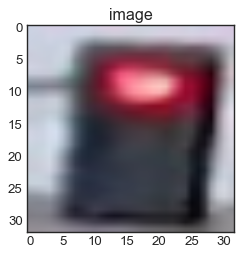

In [6]:
image     = tlc.datasets.train.images.all[0]
image_std = tlc.modify_images.standardize_image(image)
tlc.plots.plot_images(image_std)

### <span style="color:darkorange"> One-hot encoding </span>

In [7]:
label  = tlc.datasets.train.labels[0]
encode = tlc.helpers.one_hot_encode(label)
print(f"One hot encode = {encode}")

One hot encode = [1, 0, 0]


### <span style="color:darkorange"> Testing code </span>

After programming a function, it's a good idea to test it, and see if it produces the expected output. **In general, it's good practice to test code in small, functional pieces, after you write it**. This way, we can make sure that your code is correct as we continue to build a classifier, and we can identify any errors early on so that they don't compound.

One test function you'll find is: `test_one_hot(self, one_hot_function)` which takes in one argument, a one_hot_encode function, and tests its functionality. If our one_hot_label code does not work as expected, this test will print ot an error message that will tell us a bit about why our code failed. Once our code works, this should print out TEST PASSED.

In [8]:
# Instantiating an object of class 'Tests' from module 'test_functions'.
tests = tlc.tests.Tests()

# Test for one_hot_encode function
tests.test_one_hot(tlc.helpers.one_hot_encode)

**<span style="color: green;">TEST PASSED</span>**

### <span style="color:darkorange"> Construct a `STANDARDIZED_LIST` of input images and output labels </span>

- The package provides functionality in module 'traffic_light_classifier.modify_images' which can standardize an image or a list of images into their standardized form.
- This function takes in a list of image-label pairs and outputs a **standardized** list of resized images and one-hot encoded labels.

In [9]:
images_train_std        = tlc.modify_images.standardize_images( tlc.datasets.train.images_and_labels )
images_train_std_red    = [ image for image in images_train_std if image[1] == [1,0,0] ]
images_train_std_yellow = [ image for image in images_train_std if image[1] == [0,1,0] ]
images_train_std_green  = [ image for image in images_train_std if image[1] == [0,0,1] ]

### <span style="color:darkorange"> Visualize the standardized data </span>

Display a standardized image from STANDARDIZED_LIST and compare it with a non-standardized image from IMAGE_LIST. Note that their sizes and appearance are different!

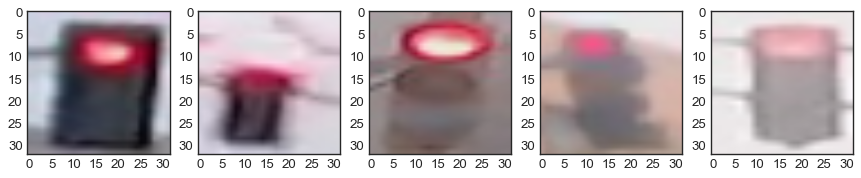

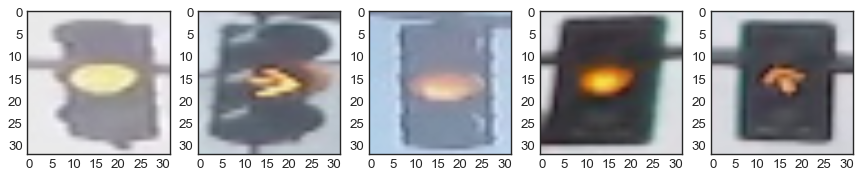

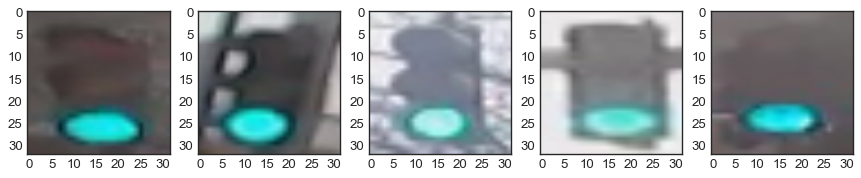

In [10]:
tlc.plots.plot_images( images_train_std_red[0:5],    figsizeScale = 0.8 )
tlc.plots.plot_images( images_train_std_yellow[0:5], figsizeScale = 0.8 )
tlc.plots.plot_images( images_train_std_green[0:5],  figsizeScale = 0.8 )

### RGB channels

In [11]:
image_rgb = images_train_std_red[0][0]

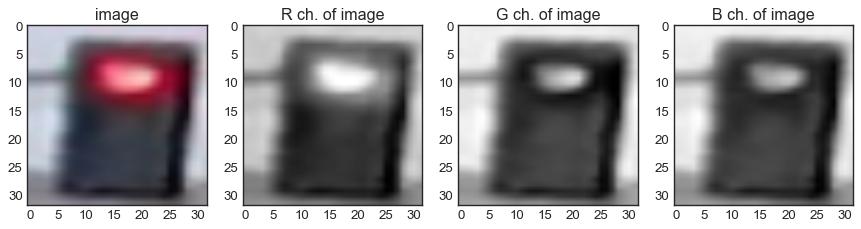

In [12]:
tlc.plots.plot_channels(image_rgb, "rgb")

### HSV channels

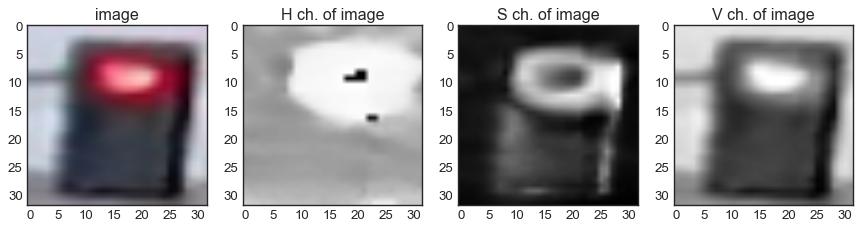

In [13]:
tlc.plots.plot_channels(image_rgb, "hsv")

# <span style="color:crimson"> 3. Methodology and Classifier model </span>

### Feature extraction from the dataset
The features are in the form of either rgb values or hsv values of the pixels of the image and their locations.
- Some feature extracted:
  - Average hsv image for red images, yellow images & green images.
  - 1D range of high saturation along width and along height for each image.
  - 1D range of high brightness along width and along height for each image..
  - 2D Region of high saturation for each image.
  - 2D Region of high brightness for each image.
  - Location of light for each image.
  - Extraction of average red light hues, average yellow light hues, average green light hues from each image.
  - Average s (saturation) of light located.
  - Average v (bright) of light located.
  - etc.

### The classifier's training stages:
1. Get average image for red, yellow and green training images.
2. Get region of high saturation in average red, yellow & green images to narrow down the search window for individual images to look for the red, yellow, and green lights.
3. Crop all training images at their respective color's average image's high saturation region.
4. Locate lights in all images by using high saturation and high brightness regions.
5. Crop images at their respective light's position
6. Get average image of red light, yellow light & average green light to see the distribution of hue, saturation and brightness in red lights, yeellow light, and green lights.
7. Get distribtution of hues, saturations and brightnesses of red lights, average yellow lights & green lights.
8. Optimize classifier's metric's parameters for red, yellow and green lights.
9. Predict & get accuracy of training dataset for classifier's optimized parameters.

### Probabilities calculations and prediction.

#### <span style="color:skyblue"> Hues extraction </span>

For a single image, the classifier extracts the following hues from the 3 regions:
1. Model's red    hues from the light located in model's red    light region.
2. Model's yellow hues from the light located in model's yellow light region.
3. Model's green  hues from the light located in model's green  light region.

#### <span style="color:red"> Probabilistic model </span>

This classifier classifies an input image either red, yellow or green based on *probabilities*.

For a single input image, 3 lights will be located in the 3 regions (i.e. red, yellow and green light regions). Then the classifier calculates **3 probabilities**:
1. Probability of image being red
2. Probability of image being yellow
3. Probability of image being green

And propobilities are calculated by,
- $Probability\ of\ image\ being\ red    = \dfrac {strength_{red}}    {strength_{red} + strength_{yellow} + strength_{green}}$
- $Probability\ of\ image\ being\ yellow = \dfrac {strength_{yellow}} {strength_{red} + strength_{yellow} + strength_{green}}$
- $Probability\ of\ image\ being\ green  = \dfrac {strength_{green}}  {strength_{red} + strength_{yellow} + strength_{green}}$

  where,  
  - $strength_{red}    = \mu_{saturation_{red}}^a    \times \mu_{brightness_{red}}^b$
  - $strength_{yellow} = \mu_{saturation_{yellow}}^a \times \mu_{brightness_{yellow}}^b$
  - $strength_{green}  = \mu_{saturation_{green}}^a  \times \mu_{brightness_{green}}^b$
  
  and,  
    - $\mu_{saturation_{red}}$   : mean saturation of the light located in model's red    light region
    - $\mu_{brightness_{red}}$   : mean brightness of the light located in model's red    light region
    - $\mu_{saturation_{yellow}}$: mean saturation of the light located in model's yellow light region
    - $\mu_{brightness_{yellow}}$: mean brightness of the light located in model's yellow light region
    - $\mu_{saturation_{green}}$ : mean saturation of the light located in model's green  light region
    - $\mu_{brightness_{green}}$ : mean brightness of the light located in model's green  light region
    - $a$ & $b$     : model's parameters

# <span style="color:crimson"> 4. Model Compilation / Model Training </span>

In [14]:
# Create an instance of class Model provided in the package
model = tlc.Model()


Compilation in progress... Please wait !!


### <span style='color: crimson;'>Compilation Stage 1: Getting average image for red, yellow and green training images</span>

hsv image of average image


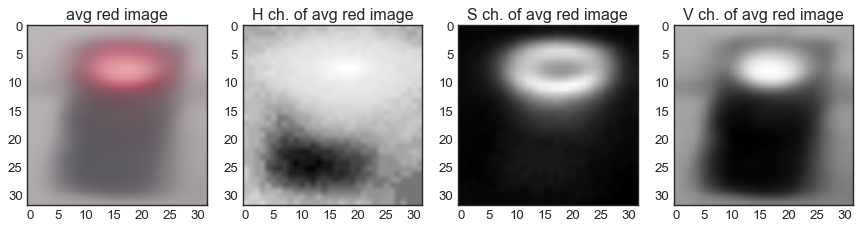

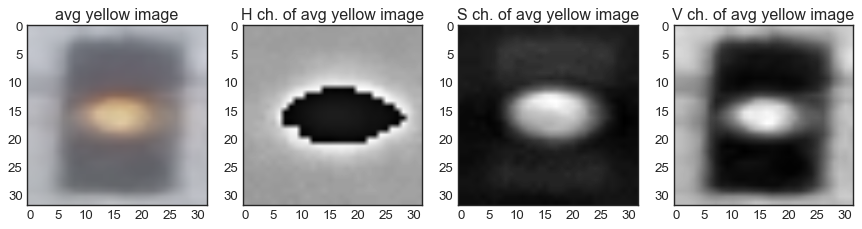

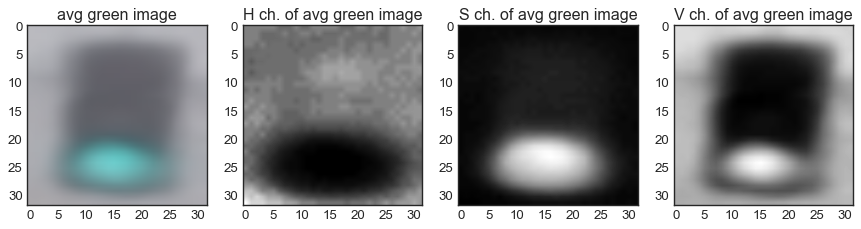

<span style='color: green;'>Done!</span>

### <span style='color: crimson;'>Compilation Stage 2: Getting region of high saturation in average red, yellow & green images</span>

Region of high saturation in average red, yellow & green images


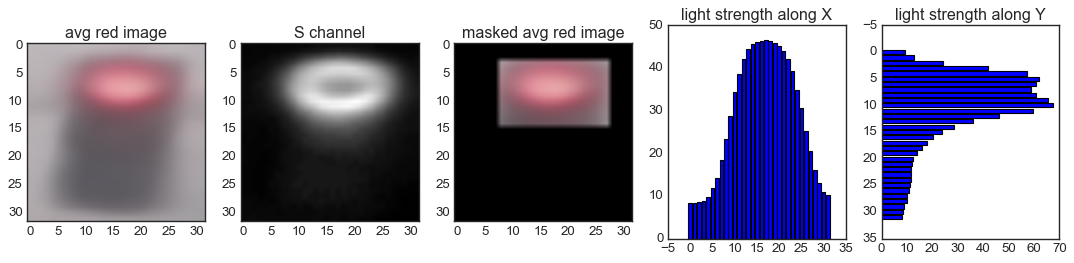

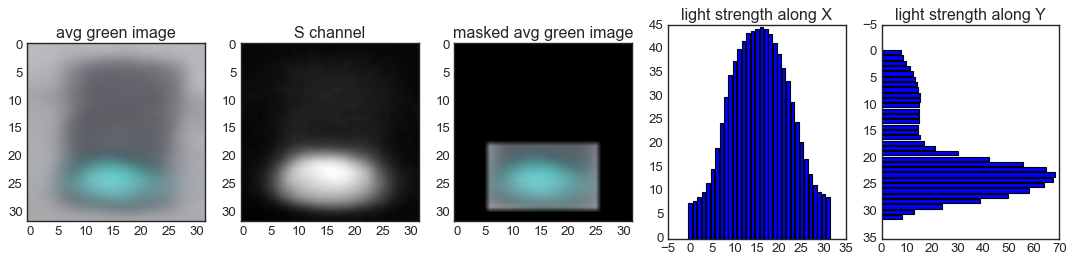

Approximate region of high Saturation red    images: X = (8, 28), Y = (3, 15)
Approximate region of high Saturation yellow images: X = (7, 27), Y = (8, 20)
Approximate region of high Saturation green  images: X = (6, 26), Y = (18, 30)


<span style='color: green;'>Done!</span>

### <span style='color: crimson;'>Compilation Stage 3: Cropping all training images at their respective color's average image's high saturation region</span>

#### <span style='color: SteelBlue;'>A few cropped lights:</span>

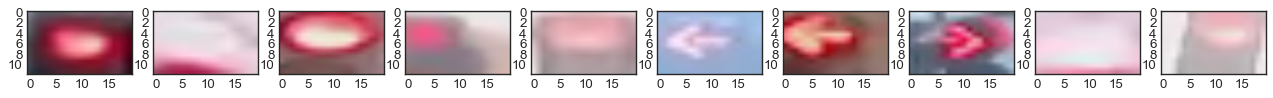

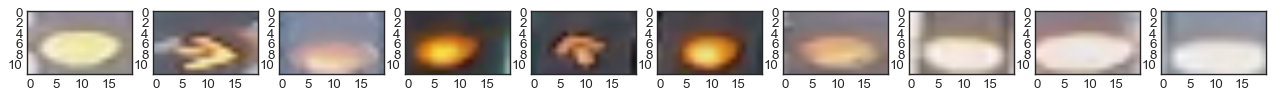

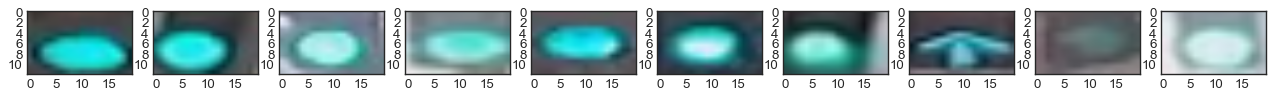

<span style='color: green;'>Done!</span>

### <span style='color: crimson;'>Compilation Stage 4: Locating lights in all images by using high saturation and high brightness regions</span>

A few locations of lights:
Location of red    lights: [((5, 17), (2, 11)), ((2, 14), (3, 12)), ((4, 16), (0, 9)), ((0, 12), (0, 9)), ((5, 17), (0, 9))], etc
Location of yellow lights: [((4, 16), (2, 11)), ((8, 20), (3, 12)), ((3, 15), (3, 12)), ((2, 14), (3, 12)), ((2, 14), (2, 11))], etc
Location of green  lights: [((5, 17), (3, 12)), ((1, 13), (3, 12)), ((4, 16), (3, 12)), ((5, 17), (2, 11)), ((4, 16), (2, 11))], etc


<span style='color: green;'>Done!</span>

### <span style='color: crimson;'>Compilation Stage 5: Cropping images at their respective light's position</span>

#### <span style='color: SteelBlue;'>A few located lights:</span>

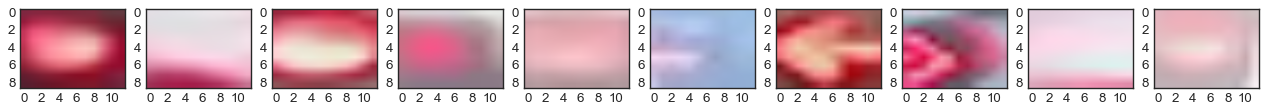

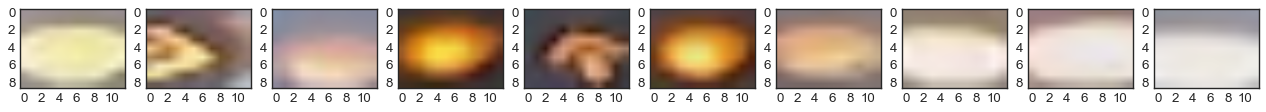

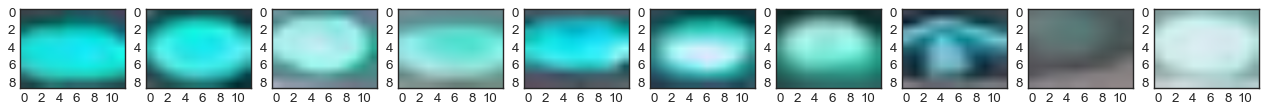

<span style='color: green;'>Done!</span>

### <span style='color: crimson;'>Compilation Stage 6: Getting images of average red light, average yellow light & average green light</span>

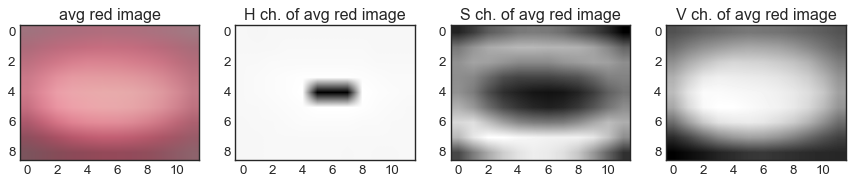

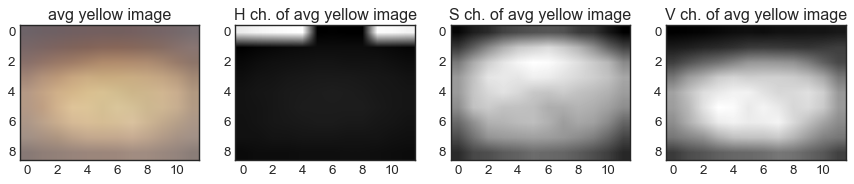

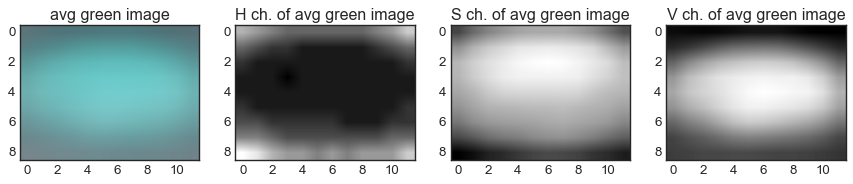

<span style='color: green;'>Done!</span>

### <span style='color: crimson;'>Compilation Stage 7: Getting hues, saturations and brightnesses of average red light, average yellow light & average green light</span>

#### <span style='color: SteelBlue;'>Compilation Stage 7a: Getting hues of average red light, average yellow light & average green light</span>

Distribution of hue in red   -lights:     mu_hue_red    = 174.667,     sigma_hue_red    = 1.660
Distribution of hue in yellow-lights:     mu_hue_yellow =  13.438,     sigma_hue_yellow = 4.330
Distribution of hue in green -lights:     mu_hue_green  =  91.620,     sigma_hue_green  = 2.120


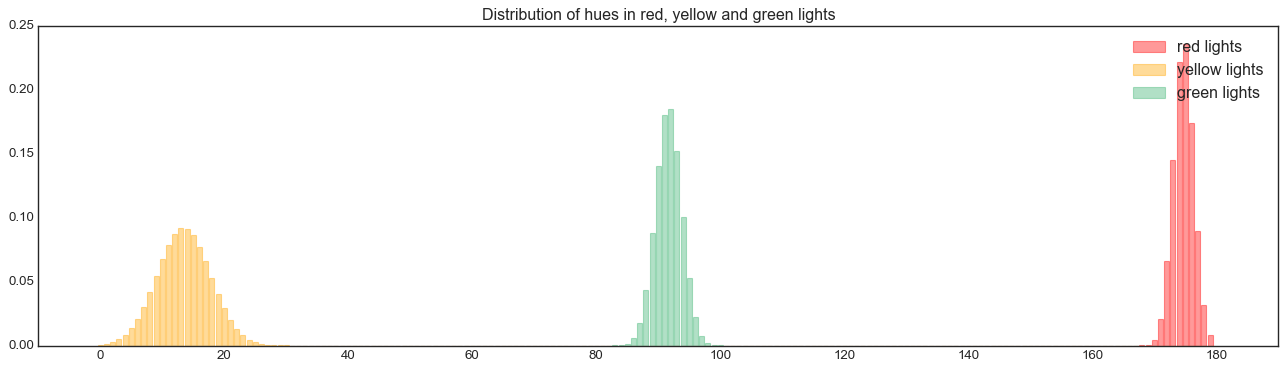

<span style='color: green;'>Done!</span>

#### <span style='color: SteelBlue;'>Compilation Stage 7b: Getting saturations of average red light, average yellow light & average green light</span>

Distribution of saturation in red   -lights:     mu_sat_red    =  99.620,     sigma_sat_red    = 17.687
Distribution of saturation in yellow-lights:     mu_sat_yellow =  66.852,     sigma_sat_yellow = 18.777
Distribution of saturation in green -lights:     mu_sat_green  =  95.426,     sigma_sat_green  = 20.873


<span style='color: green;'>Done!</span>

#### <span style='color: SteelBlue;'>Compilation Stage 7c: Getting brightnesses of average red light, average yellow light & average green light</span>

Distribution of brightness in red   -lights:     mu_brt_red    = 194.139,     sigma_brt_red    = 29.911
Distribution of brightness in yellow-lights:     mu_brt_yellow = 170.630,     sigma_brt_yellow = 33.392
Distribution of brightness in green -lights:     mu_brt_green  = 165.750,     sigma_brt_green  = 25.677


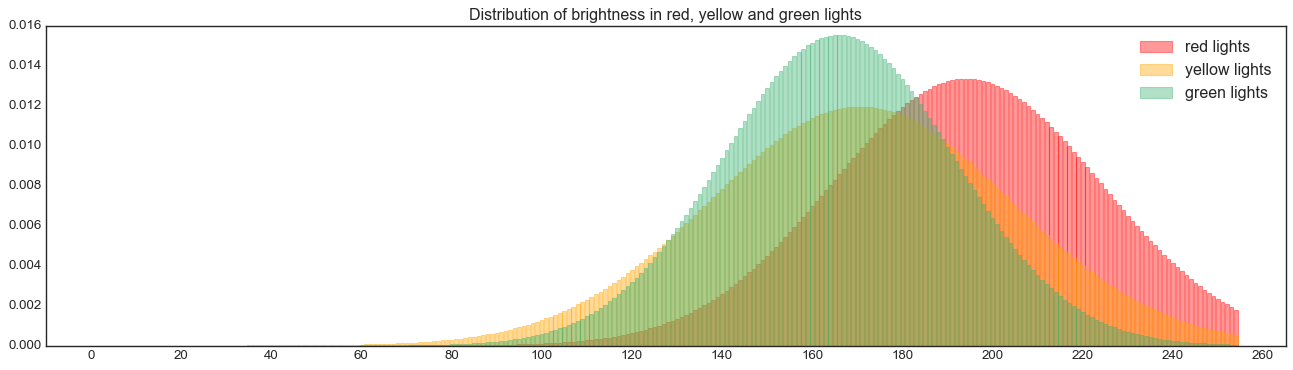

<span style='color: green;'>Done!</span>

### <span style='color: crimson;'>Compilation Stage 8: Optimizing classifier's metric's parameters for red, yellow and green lights</span>


#### <span style="color:SteelBlue"> Hues extraction </span>

For a single image, the classifier extracts the following hues from the 3 regions:
1. Model's red    hues extracted from the light located in model's red    light region
2. Model's yellow hues extracted from the light located in model's yellow light region
3. Model's green  hues extracted from the light located in model's green  light region

The image with extracted hues above will be used in calculating the probabilities of image being red, yellow, and green. The probabilities depends not on the hues but on the corresponding average saturation and average brightness.

#### <span style="color:red"> Probabilistic model </span>

**This classifier classifies an input image either red, yellow or green based on *probabilities*.**

For a single input image, this classifier calculates **3 probabilities**:
1. Probability of image being red
2. Probability of image being yellow
3. Probability of image being green

And propobilities are calculated by,
- $Probability\ of\ image\ being\ red    = \dfrac {strength_{red}}    {strength_{red} + strength_{yellow} + strength_{green}}$
- $Probability\ of\ image\ being\ yellow = \dfrac {strength_{yellow}} {strength_{red} + strength_{yellow} + strength_{green}}$
- $Probability\ of\ image\ being\ green  = \dfrac {strength_{green}}  {strength_{red} + strength_{yellow} + strength_{green}}$

  where,  
  - $strength_{red}    = \mu_{saturation_{red}}^a    \times \mu_{brightness_{red}}^b$
  - $strength_{yellow} = \mu_{saturation_{yellow}}^a \times \mu_{brightness_{yellow}}^b$
  - $strength_{green}  = \mu_{saturation_{green}}^a  \times \mu_{brightness_{green}}^b$
  
  and,  
    - $\mu_{saturation_{red}}$   : mean saturation of the light located in model's red    light region
    - $\mu_{brightness_{red}}$   : mean brightness of the light located in model's red    light region
    - $\mu_{saturation_{yellow}}$: mean saturation of the light located in model's yellow light region
    - $\mu_{brightness_{yellow}}$: mean brightness of the light located in model's yellow light region
    - $\mu_{saturation_{green}}$ : mean saturation of the light located in model's green  light region
    - $\mu_{brightness_{green}}$ : mean brightness of the light located in model's green  light region
    - $a$ & $b$     : model's parameters


**The current compilation stage is optimizing the parameters $a$ & $b$ for maximum accuracy.**

Please wait...

**Optimization complete !!**

<span style='color: green;'>Optimized parameters: a = 2.000000, b = 3.000000</span>

<span style='color: green;'>Done!</span>

### <span style='color: crimson;'>Compilation Stage 9: Prediction analysis & accuracy of training dataset for classifier's optimized parameters</span>

#### <span style='color: SteelBlue;'>Red light training dataset (a few examples)</span>

**Model's red hues extracted from the red lights located in model's red light region:**

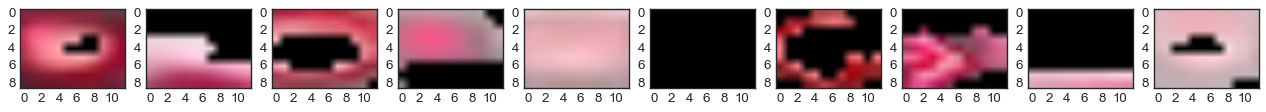

Probability of being red: [1.0, 1.0, 1.0, 1.0, 1.0, 0.33333, 0.9999, 1.0, 1.0, 1.0]


**Model's yellow hues extracted from the yellow lights located in model's yellow light region:**

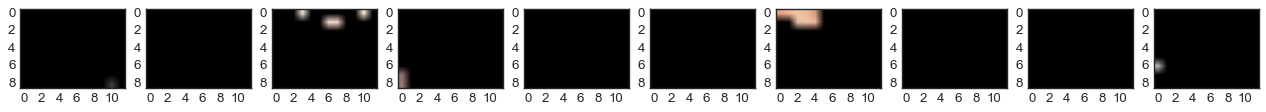

Probability of being yellow: [0.0, 0.0, 0.0, 0.0, 0.0, 0.33333, 0.0001, 0.0, 0.0, 0.0]


**Model's green hues extracted from the yellow lights located in model's yellow light region:**

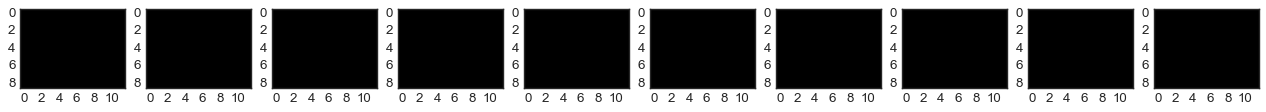

Probability of being green: [0.0, 0.0, 0.0, 0.0, 0.0, 0.33333, 0.0, 0.0, 0.0, 0.0]
Predicted labels: ['red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red']
Total red images: 723
Predicted Red    = 723
Predicted Yellow = 0
Predicted Green  = 0


<span style='color: green;'>Accuracy  red images= 100.00%</span>

#### <span style='color: SteelBlue;'>Yellow light training dataset (a few examples)</span>

**Model's red hues extracted from the red lights located in model's red light region:**

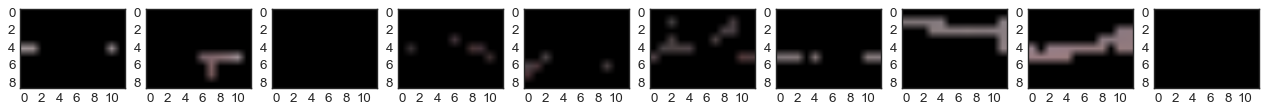

Probability of being red: [3e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1e-05, 0.00307, 0.0]


**Model's yellow hues extracted from the yellow lights located in model's yellow light region:**

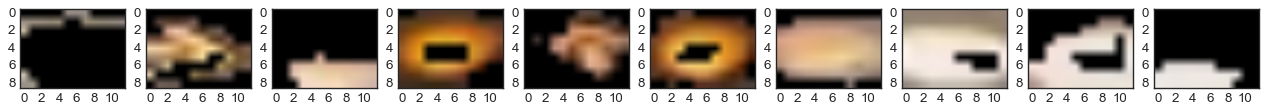

Probability of being yellow: [0.99997, 1.0, 1.0, 0.9994, 0.99948, 1.0, 1.0, 0.99999, 0.99693, 1.0]


**Model's green hues extracted from the yellow lights located in model's yellow light region:**

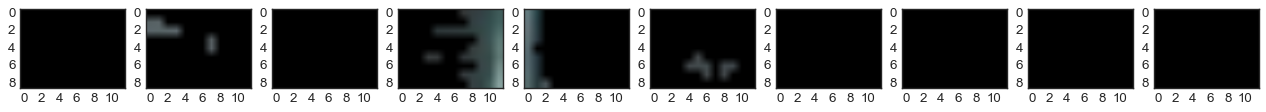

Probability of being green: [0.0, 0.0, 0.0, 0.0006, 0.00052, 0.0, 0.0, 0.0, 0.0, 0.0]
Predicted labels: ['yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow']
Total yellow images: 35
Predicted Red    = 2
Predicted Yellow = 33
Predicted Green  = 0


<span style='color: green;'>Accuracy  yellow images= 94.29%</span>

#### <span style='color: SteelBlue;'>Green light training dataset (a few examples)</span>

**Model's red hues extracted from the red lights located in model's red light region:**

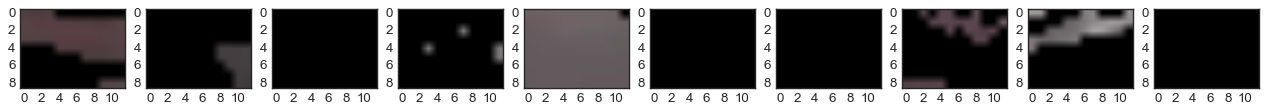

Probability of being red: [0.0004, 0.0, 0.0, 0.0, 0.00603, 0.0, 0.0, 6e-05, 0.00069, 0.0]


**Model's yellow hues extracted from the yellow lights located in model's yellow light region:**

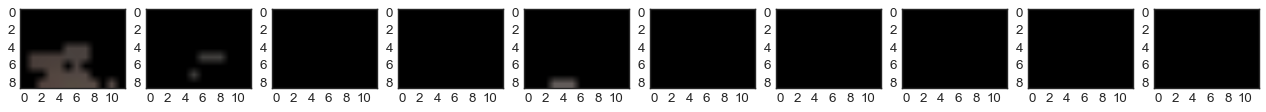

Probability of being yellow: [1e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


**Model's green hues extracted from the yellow lights located in model's yellow light region:**

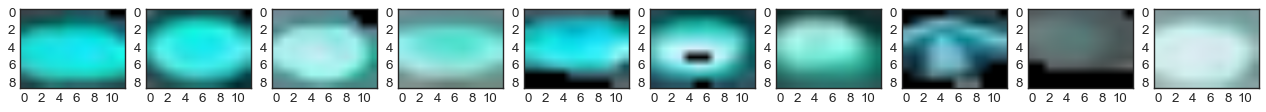

Probability of being green: [0.99959, 1.0, 1.0, 1.0, 0.99397, 1.0, 1.0, 0.99994, 0.99931, 1.0]
Predicted labels: ['green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green']
Total green images: 429
Predicted Red    = 4
Predicted Yellow = 0
Predicted Green  = 425


<span style='color: green;'>Accuracy  green images= 99.07%</span>

**<span style='color: SteelBlue;'>Overall accuracy</span>**

Total images     = 1187
Pred correctly   = 1181


**<span style='color: green;'>Accuracy overall = 99.49%</span>**

<span style='color: green;'>Done!</span>

#### <span style='color: green;'>Compilation complete !!</span>

In [15]:
# Call `compile` method of model object to train the model
# Note: Use parameter `show_analysis = True` to see the detailed process of the training/compiling stages.
# model.compile()
model.compile(show_analysis = True)

# <span style="color:crimson"> 5. Predict Image </span>

Probability of image being red    = 1.000
Probability of image being yellow = 0.000
Probability of image being green  = 0.000
This image is 'RED'


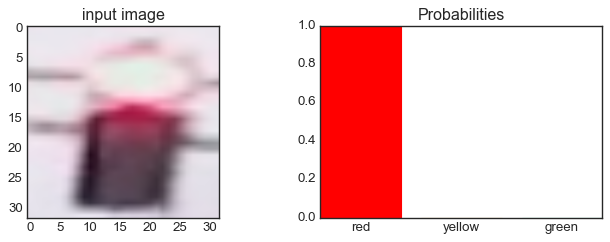

[1, 0, 0]

In [16]:
# Get a random red image from the test dataset provided in the package
import random
image_red = random.choice( tlc.datasets.test.images_std.red )

# Note: Use parameter `show_probabilities = True` to see the classification probabilities.
#       Use parameter `show_analysis = True` to see the detailed process of the prediction stages.
label_predicted = model.predict( image_red, show_probabilities = True )
label_predicted

In [17]:
image_yellow = random.choice( tlc.datasets.test.images_std.yellow )
label_predicted = model.predict( image_yellow, show_probabilities = True )
label_predicted

Probability of image being red    = 0.002
Probability of image being yellow = 0.998
Probability of image being green  = 0.000
This image is 'YELLOW'


[0, 1, 0]

In [18]:
image_green = random.choice( tlc.datasets.test.images_std.green )
label_predicted = model.predict( image_green, show_probabilities = True )
label_predicted

Probability of image being red    = 0.000
Probability of image being yellow = 0.000
Probability of image being green  = 1.000
This image is 'GREEN'


[0, 0, 1]

# <span style="color:crimson"> 5. Analyzing/visualizing prediction process </span>

### <span style='color: crimson;'>Prediction Stage 1: Cropping image at model's optimal high saturation region for red, yellow, green light's position</span>

This procedure uses saturation features.


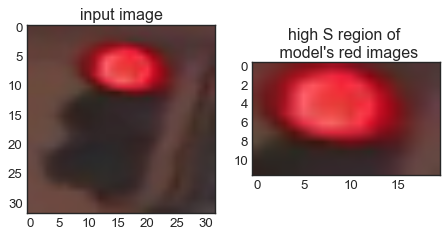

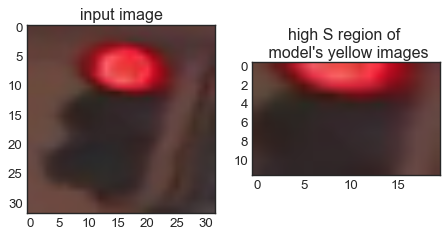

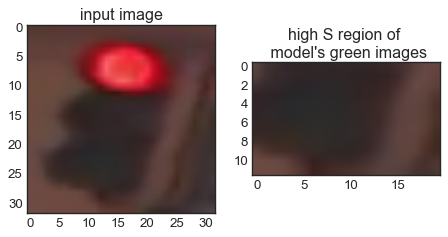

<span style='color: green;'>Done!</span>

### <span style='color: crimson;'>Prediction Stage 2: Locating light in model's optimal regions of red, yellow, green lights</span>

This procedure uses saturation and brightness features.


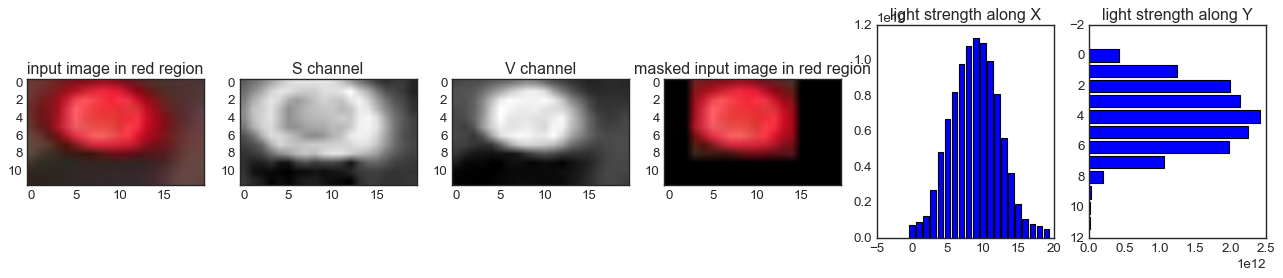

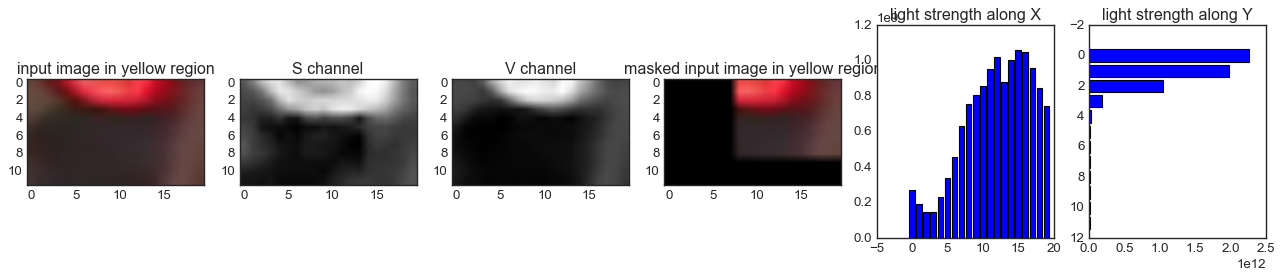

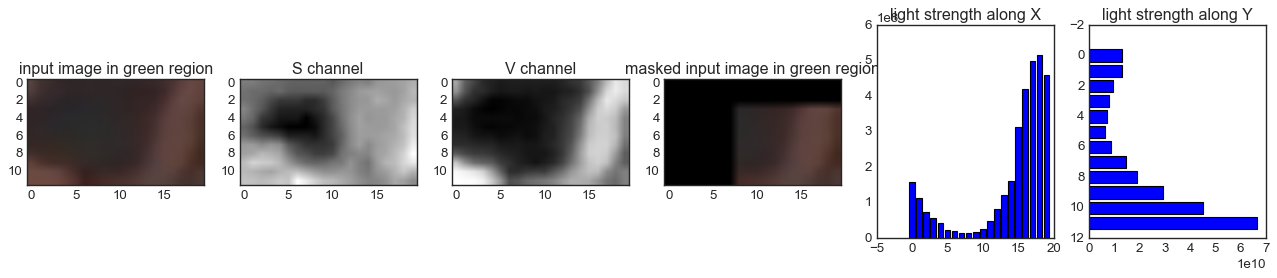

<span style='color: green;'>Done!</span>

### <span style='color: crimson;'>Prediction Stage 3: Cropping image at model's optimal region of red, yellow, green lights</span>

<span style='color: green;'>Done!</span>

### <span style='color: crimson;'>Prediction Stage 4: Extracting model's red, yellow, green light's colors from the respective cropped parts of the input image</span>

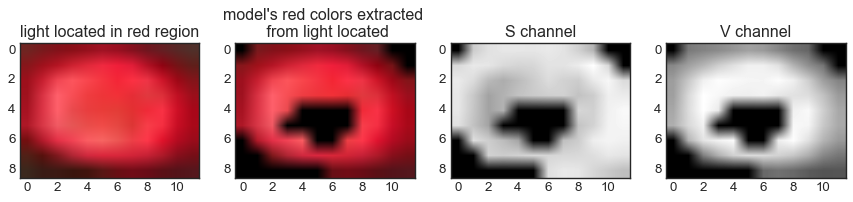

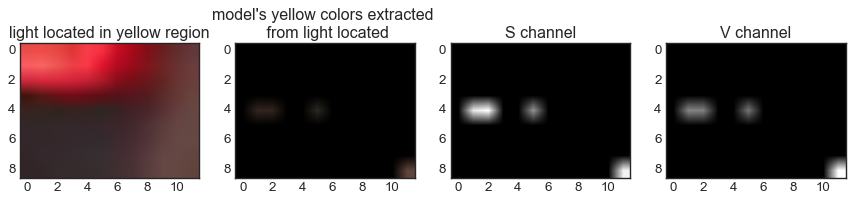

<span style='color: green;'>Done!</span>

### <span style='color: crimson;'>Prediction Stage 5a: Getting hues from the extracted colors at model's optimal region of red, yellow, green lights</span>

#### <span style='color: SteelBlue;'>Prediction Stage 5a: Getting hues from the extracted colors at model's optimal region of red, yellow, green lights</span>

Distribution of hues at model's red    light region:     mu_hue_red    = 177.429,     sigma_hue_red    = 0.955
Distribution of hues at model's yellow light region:     mu_hue_yellow =  11.500,     sigma_hue_yellow = 4.031
Distribution of hues at model's green  light region:     mu_hue_green  =   0.000,     sigma_hue_green  = 0.000


<span style='color: green;'>Done!</span>

#### <span style='color: SteelBlue;'>Prediction Stage 5b: Getting saturations from the extracted colors at model's optimal region of red, yellow, green lights</span>

Distribution of saturations at model's red    light region:     mu_sat_red    = 162.787,     sigma_sat_red    = 88.921
Distribution of saturations at model's yellow light region:     mu_sat_yellow =   3.213,     sigma_sat_yellow = 16.703
Distribution of saturations at model's green  light region:     mu_sat_green  =   0.000,     sigma_sat_green  = 0.000


<span style='color: green;'>Done!</span>

#### <span style='color: SteelBlue;'>Prediction Stage 5c: Getting brightnesses from the extracted colors at model's optimal region of red, yellow, green lights</span>

Distribution of brightnesses at model's red    light region:     mu_brt_red    = 148.009,     sigma_brt_red    = 90.567
Distribution of brightnesses at model's yellow light region:     mu_brt_yellow =   2.204,     sigma_brt_yellow = 11.953
Distribution of brightnesses at model's green  light region:     mu_brt_green  =   0.000,     sigma_brt_green  = 0.000


<span style='color: green;'>Done!</span>

### <span style='color: crimson;'>Prediction Stage 6: Calculating probabilities of image being red, yellow and green</span>


#### <span style="color:SteelBlue"> Hues extraction </span>

For a single image, the classifier extracts the following hues from the 3 regions:
1. Model's red    hues extracted from the light located in model's red    light region
2. Model's yellow hues extracted from the light located in model's yellow light region
3. Model's green  hues extracted from the light located in model's green  light region

The image with extracted hues above will be used in calculating the probabilities of image being red, yellow, and green. The probabilities depends not on the hues but on the corresponding average saturation and average brightness.

#### <span style="color:red"> Probabilistic model </span>

**This classifier classifies an input image either red, yellow or green based on *probabilities*.**

For a single input image, this classifier calculates **3 probabilities**:
1. Probability of image being red
2. Probability of image being yellow
3. Probability of image being green

And propobilities are calculated by,
- $Probability\ of\ image\ being\ red    = \dfrac {strength_{red}}    {strength_{red} + strength_{yellow} + strength_{green}}$
- $Probability\ of\ image\ being\ yellow = \dfrac {strength_{yellow}} {strength_{red} + strength_{yellow} + strength_{green}}$
- $Probability\ of\ image\ being\ green  = \dfrac {strength_{green}}  {strength_{red} + strength_{yellow} + strength_{green}}$

  where,  
  - $strength_{red}    = \mu_{saturation_{red}}^a    \times \mu_{brightness_{red}}^b$
  - $strength_{yellow} = \mu_{saturation_{yellow}}^a \times \mu_{brightness_{yellow}}^b$
  - $strength_{green}  = \mu_{saturation_{green}}^a  \times \mu_{brightness_{green}}^b$
  
  and,  
    - $\mu_{saturation_{red}}$   : mean saturation of the light located in model's red    light region
    - $\mu_{brightness_{red}}$   : mean brightness of the light located in model's red    light region
    - $\mu_{saturation_{yellow}}$: mean saturation of the light located in model's yellow light region
    - $\mu_{brightness_{yellow}}$: mean brightness of the light located in model's yellow light region
    - $\mu_{saturation_{green}}$ : mean saturation of the light located in model's green  light region
    - $\mu_{brightness_{green}}$ : mean brightness of the light located in model's green  light region
    - $a$ & $b$     : model's parameters


Probability of image being red    = 1.000
Probability of image being yellow = 0.000
Probability of image being green  = 0.000


<span style='color: green;'>Done!</span>

### <span style='color: crimson;'>Prediction Stage 7: Predicting image</span>

This image is 'RED'


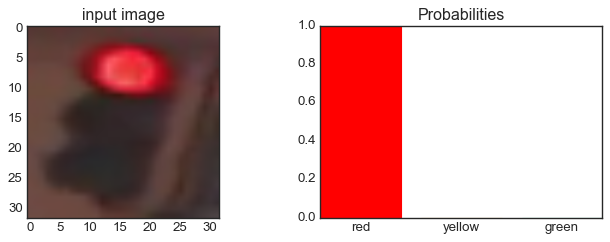

<span style='color: green;'>Done!</span>

In [19]:
image_red = random.choice( tlc.datasets.train.images_std.red )
tlc.plots.plot_images(image_red)
label_predicted = model.predict( image_red, show_analysis = True )

# <span style="color:crimson"> 6. Checking Validating of our classifier: Testing set </span>

In [20]:
# Standardize the test data
STANDARDIZED_TEST_LIST = tlc.datasets.test.images_and_labels_std

# Shuffle the standardized test data
random.shuffle(STANDARDIZED_TEST_LIST)

In [21]:
estimate_label = model.predict

In [22]:
# Constructs a list of misclassified images given a list of test images and their labels
# This will throw an AssertionError if labels are not standardized (one-hot encoded)

def get_misclassified_images(test_images):
    # Tracking misclassified images by placing them into a list >>
    misclassified_images_labels = []

    # Iterating through all the test images >>
    # Classifying each image and compare to the true label >>
    for image in test_images:

        # Get true data >>
        im = image[0]
        true_label = image[1]
        assert(len(true_label) == 3), "The true_label is not the expected length (3)."

        # Get predicted label from your classifier >>
        predicted_label = estimate_label(im)
        assert(len(predicted_label) == 3), "The predicted_label is not the expected length (3)."

        # Compare true and predicted labels >>
        if(predicted_label != true_label):
            # If these labels are not equal, the image has been misclassified >>
            misclassified_images_labels.append((im, predicted_label, true_label))
            
    # Return the list of misclassified [image, predicted_label, true_label] values >>
    return misclassified_images_labels


# Find all misclassified images in a given test set >>
MISCLASSIFIED = get_misclassified_images(STANDARDIZED_TEST_LIST)

# Accuracy calculations >>
total       = len(STANDARDIZED_TEST_LIST)
num_correct = total - len(MISCLASSIFIED)
accuracy    = num_correct/total

print('Accuracy: ' + str(accuracy))
print("Number of misclassified images = " + str(len(MISCLASSIFIED)) +' out of '+ str(total))


Accuracy: 0.9966329966329966
Number of misclassified images = 1 out of 297


## <span style="color:darkorange"> Results </span>
### <span style="color:green"> Accuracy of testing dataset: 99.66 % </span>

# <span style="color:crimson"> 7. Analyzing misclassified images </span>

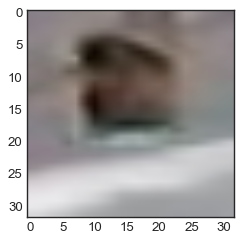

In [23]:
tlc.plots.plot_images(MISCLASSIFIED)

### <span style='color: crimson;'>Prediction Stage 1: Cropping image at model's optimal high saturation region for red, yellow, green light's position</span>

This procedure uses saturation features.


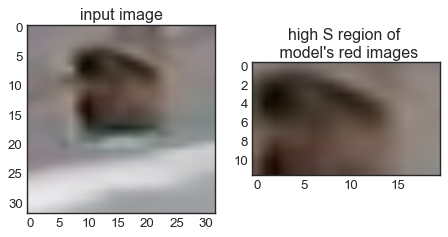

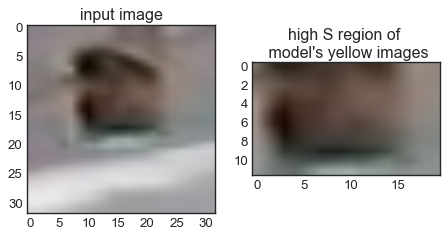

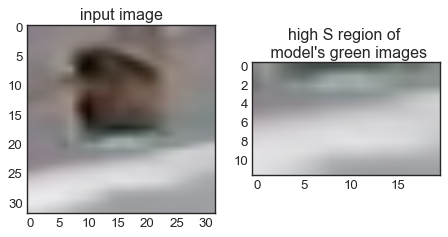

<span style='color: green;'>Done!</span>

### <span style='color: crimson;'>Prediction Stage 2: Locating light in model's optimal regions of red, yellow, green lights</span>

This procedure uses saturation and brightness features.


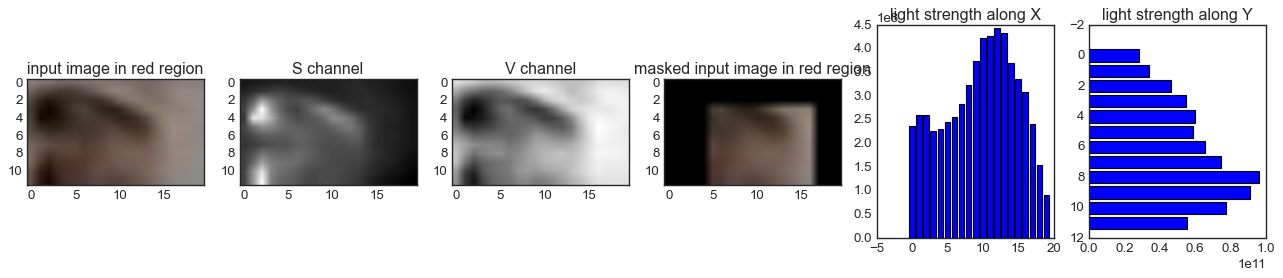

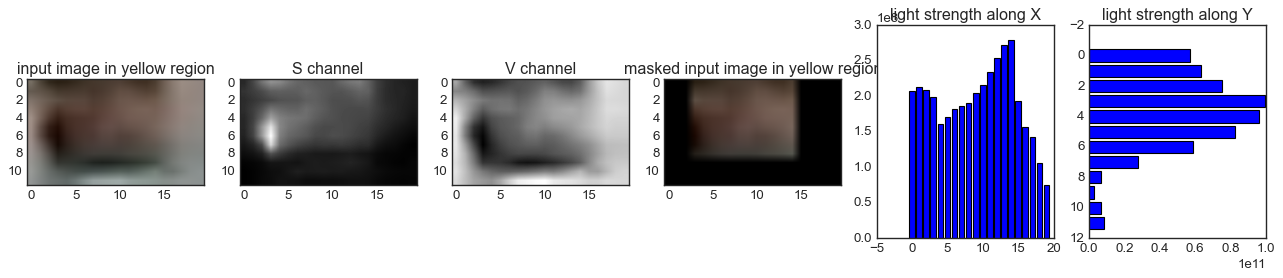

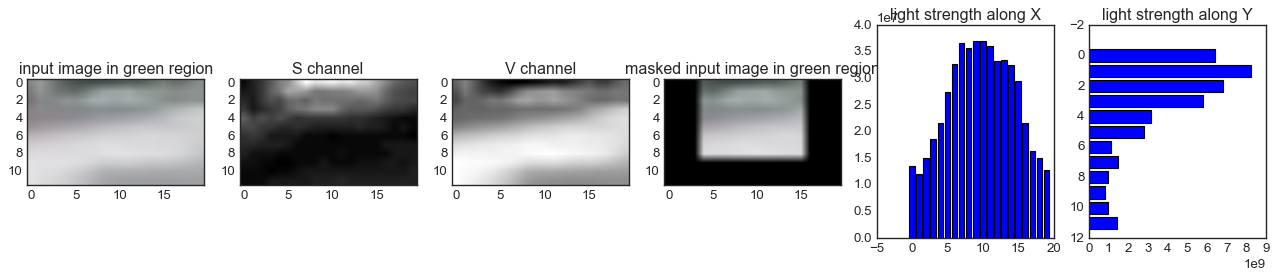

<span style='color: green;'>Done!</span>

### <span style='color: crimson;'>Prediction Stage 3: Cropping image at model's optimal region of red, yellow, green lights</span>

<span style='color: green;'>Done!</span>

### <span style='color: crimson;'>Prediction Stage 4: Extracting model's red, yellow, green light's colors from the respective cropped parts of the input image</span>

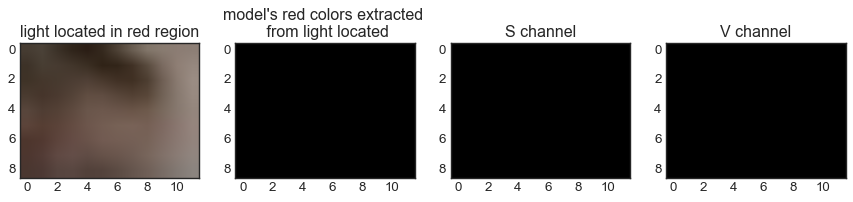

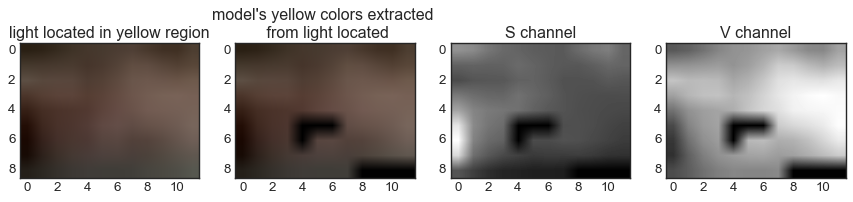

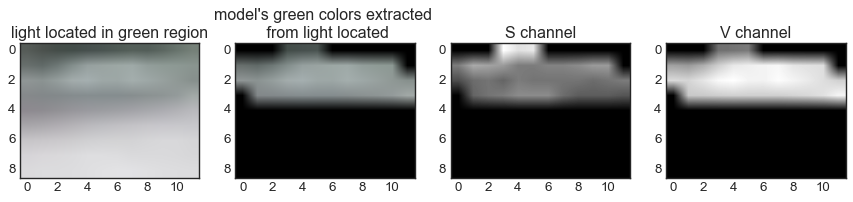

<span style='color: green;'>Done!</span>

### <span style='color: crimson;'>Prediction Stage 5a: Getting hues from the extracted colors at model's optimal region of red, yellow, green lights</span>

#### <span style='color: SteelBlue;'>Prediction Stage 5a: Getting hues from the extracted colors at model's optimal region of red, yellow, green lights</span>

Distribution of hues at model's red    light region:     mu_hue_red    =   0.000,     sigma_hue_red    = 0.000
Distribution of hues at model's yellow light region:     mu_hue_yellow =  11.130,     sigma_hue_yellow = 3.081
Distribution of hues at model's green  light region:     mu_hue_green  =  86.892,     sigma_hue_green  = 5.954


<span style='color: green;'>Done!</span>

#### <span style='color: SteelBlue;'>Prediction Stage 5b: Getting saturations from the extracted colors at model's optimal region of red, yellow, green lights</span>

Distribution of saturations at model's red    light region:     mu_sat_red    =   0.000,     sigma_sat_red    = 0.000
Distribution of saturations at model's yellow light region:     mu_sat_yellow =  78.944,     sigma_sat_yellow = 38.387
Distribution of saturations at model's green  light region:     mu_sat_green  =   5.806,     sigma_sat_green  = 8.541


<span style='color: green;'>Done!</span>

#### <span style='color: SteelBlue;'>Prediction Stage 5c: Getting brightnesses from the extracted colors at model's optimal region of red, yellow, green lights</span>

Distribution of brightnesses at model's red    light region:     mu_brt_red    =   0.000,     sigma_brt_red    = 0.000
Distribution of brightnesses at model's yellow light region:     mu_brt_yellow =  75.611,     sigma_brt_yellow = 29.940
Distribution of brightnesses at model's green  light region:     mu_brt_green  =  49.972,     sigma_brt_green  = 70.766


<span style='color: green;'>Done!</span>

### <span style='color: crimson;'>Prediction Stage 6: Calculating probabilities of image being red, yellow and green</span>


#### <span style="color:SteelBlue"> Hues extraction </span>

For a single image, the classifier extracts the following hues from the 3 regions:
1. Model's red    hues extracted from the light located in model's red    light region
2. Model's yellow hues extracted from the light located in model's yellow light region
3. Model's green  hues extracted from the light located in model's green  light region

The image with extracted hues above will be used in calculating the probabilities of image being red, yellow, and green. The probabilities depends not on the hues but on the corresponding average saturation and average brightness.

#### <span style="color:red"> Probabilistic model </span>

**This classifier classifies an input image either red, yellow or green based on *probabilities*.**

For a single input image, this classifier calculates **3 probabilities**:
1. Probability of image being red
2. Probability of image being yellow
3. Probability of image being green

And propobilities are calculated by,
- $Probability\ of\ image\ being\ red    = \dfrac {strength_{red}}    {strength_{red} + strength_{yellow} + strength_{green}}$
- $Probability\ of\ image\ being\ yellow = \dfrac {strength_{yellow}} {strength_{red} + strength_{yellow} + strength_{green}}$
- $Probability\ of\ image\ being\ green  = \dfrac {strength_{green}}  {strength_{red} + strength_{yellow} + strength_{green}}$

  where,  
  - $strength_{red}    = \mu_{saturation_{red}}^a    \times \mu_{brightness_{red}}^b$
  - $strength_{yellow} = \mu_{saturation_{yellow}}^a \times \mu_{brightness_{yellow}}^b$
  - $strength_{green}  = \mu_{saturation_{green}}^a  \times \mu_{brightness_{green}}^b$
  
  and,  
    - $\mu_{saturation_{red}}$   : mean saturation of the light located in model's red    light region
    - $\mu_{brightness_{red}}$   : mean brightness of the light located in model's red    light region
    - $\mu_{saturation_{yellow}}$: mean saturation of the light located in model's yellow light region
    - $\mu_{brightness_{yellow}}$: mean brightness of the light located in model's yellow light region
    - $\mu_{saturation_{green}}$ : mean saturation of the light located in model's green  light region
    - $\mu_{brightness_{green}}$ : mean brightness of the light located in model's green  light region
    - $a$ & $b$     : model's parameters


Probability of image being red    = 0.000
Probability of image being yellow = 0.998
Probability of image being green  = 0.002


<span style='color: green;'>Done!</span>

### <span style='color: crimson;'>Prediction Stage 7: Predicting image</span>

This image is 'YELLOW'


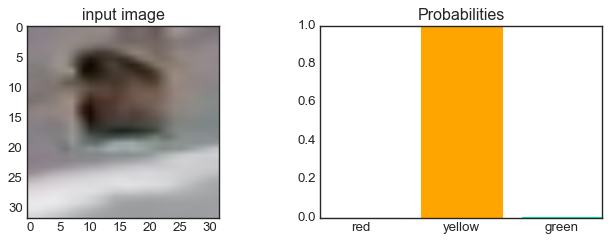

<span style='color: green;'>Done!</span>

[0, 1, 0]

In [24]:
model.predict(MISCLASSIFIED[0][0], show_analysis = True )

### <span style="color:darkorange"> Reasoning for the misclassification </span>

From the above analysis of the one and only missclassified image, we can clearly see that the image is going through all the prediction stages as it is supposed to.  
The reason for misclassification is also very evident from stage 4:
  - The traffic light housing is yellow colored, and it is bigger than the size of the green signal light itself.
  - Even though the classifier has detected the green signal light, but its size is small compared to the size of the housing.
  - Thus the average saturation and brightness of the green signal light is less than the saturation & brightness of the housing.

### <span style="color:darkorange"> Conclusion </span>

- The accuracy of the classifier on the test dataset found to be **<span style="color:green"> 99.66 % </span>**.
- The only misclassified image can be considered as an exception/outlier since the housing is very different than all the other traffic light housing.

#### Shashank Kumbhare
email: shashankkumbhare8@gmail.com  
phone: (682) 812-9211  
[LinkedIn](https://www.linkedin.com/in/shashank-kumbhare/)  

[View this project on GitHub](https://github.com/ShashankKumbhare/traffic-light-classifier)  
[Link to the implemented package code](https://github.com/ShashankKumbhare/traffic-light-classifier/tree/main/traffic_light_classifier)  